# EMG for Basic hand Movement dataset, there are six events of hand Movement 
# i. Cylindrical grasp
# ii. Tip
# iii. Lifthing heavy object-hook
# iV. palm activity
# V. spherical grasp
# Vi. holding flat surface - laterial 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [5]:
#working on Nina Pro database 
df1=scipy.io.loadmat('C:/Users/prabh/Downloads/sEMG_Basic_Hand_movements_upatras/Database 1/female_1.mat')
df2=scipy.io.loadmat('C:/Users/prabh/Downloads/sEMG_Basic_Hand_movements_upatras/Database 1/female_2.mat')
df3=scipy.io.loadmat('C:/Users/prabh/Downloads/sEMG_Basic_Hand_movements_upatras/Database 1/female_3.mat')
df4= scipy.io.loadmat('C:/Users/prabh/Downloads/sEMG_Basic_Hand_movements_upatras/Database 1/male_1.mat')
df5= scipy.io.loadmat('C:/Users/prabh/Downloads/sEMG_Basic_Hand_movements_upatras/Database 1/male_2.mat')

In [43]:
df1.keys

<function dict.keys>

In [57]:
"""
emg_data1= df1.get('emg')
glove_data1 = df1.get('glove')
stimulus_data1 = df1.get('stimulus')
restimulus_data1 = df1.get('restimulus')
repetition_data1 = df1.get('repetition')
rerepetition_data1 = df1.get('rerepetition')
"""
#Assigning label as one
cyl_ch1 = df1.get('cyl_ch1')
cyl_ch2 = df1.get('cyl_ch2')
#Assigning label as two
hook_ch1 = df1.get('hook_ch1')
hook_ch2 = df1.get('hook_ch2')
##Assigning label as three
tip_ch1 = df1.get('tip_ch1')
tip_ch2 = df1.get('tip_ch2')
#Assigning label as four
palm_ch1 = df1.get('palm_ch1')
palm_ch2 = df1.get('palm_ch2')
#Assigning label as five
spher_ch1 = df1.get('spher_ch1')
spher_ch2 = df1.get('spher_ch2')
#Assigning label as six





In [79]:
cyl_ch1[1]

array([ 0.25071 ,  0.301713,  0.199706, ..., -0.616346,  0.454723,
        0.021195])

In [112]:
data_x= []
for i in range(len(cyl_ch1)):
    data_x.append(momentum(cyl_ch1[i]))
    
for i in range(len(cyl_ch1)):
    data_x.append(momentum(cyl_ch2[i]))
    
for i in range(len(cyl_ch1)):
    data_x.append(momentum(hook_ch1[i]))
    
for i in range(len(cyl_ch1)):
    data_x.append(momentum(hook_ch2[i]))
    
for i in range(len(cyl_ch1)):
    data_x.append(momentum(tip_ch1[i]))
                          
for i in range(len(cyl_ch1)):
    data_x.append(momentum(tip_ch2[i]))
    
for i in range(len(cyl_ch1)):
    data_x.append(momentum(palm_ch1[i]))
    
for i in range(len(cyl_ch1)):
    data_x.append(momentum(palm_ch2[i]))
    
for i in range(len(cyl_ch1)):
    data_x.append(momentum(spher_ch2[i]))
    
for i in range(len(cyl_ch1)):
    data_x.append(momentum(spher_ch2[i]))
    
    

In [113]:
len(data_x)

300

# plotting the EMG signal

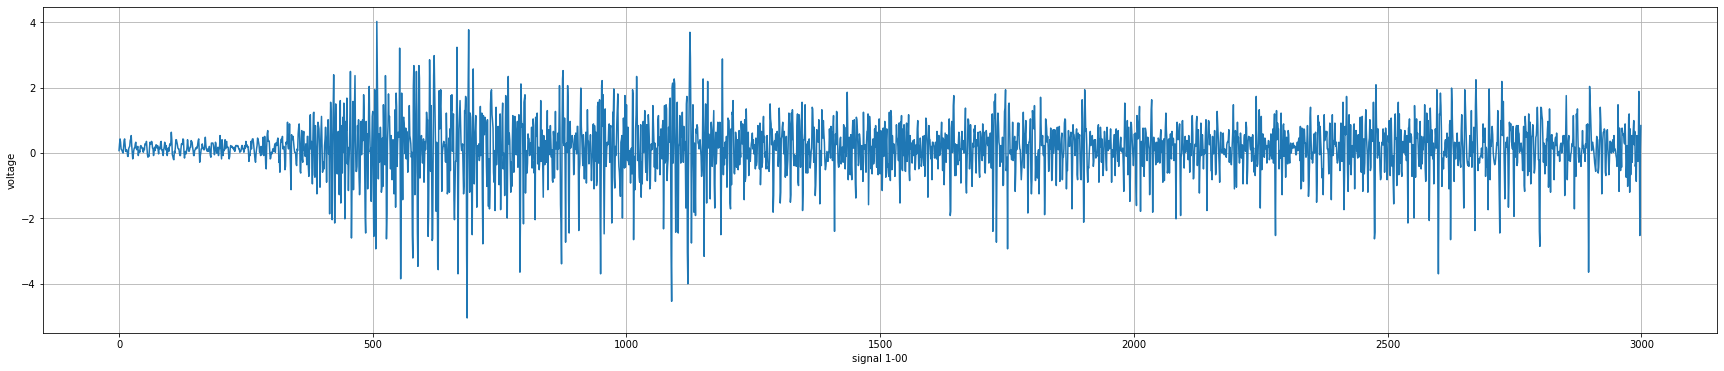

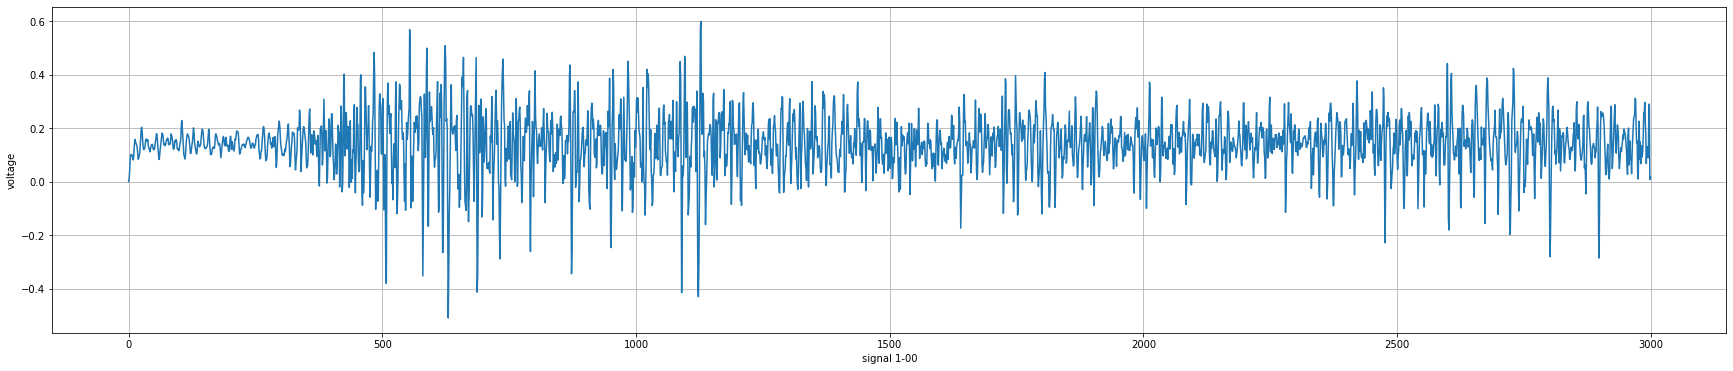

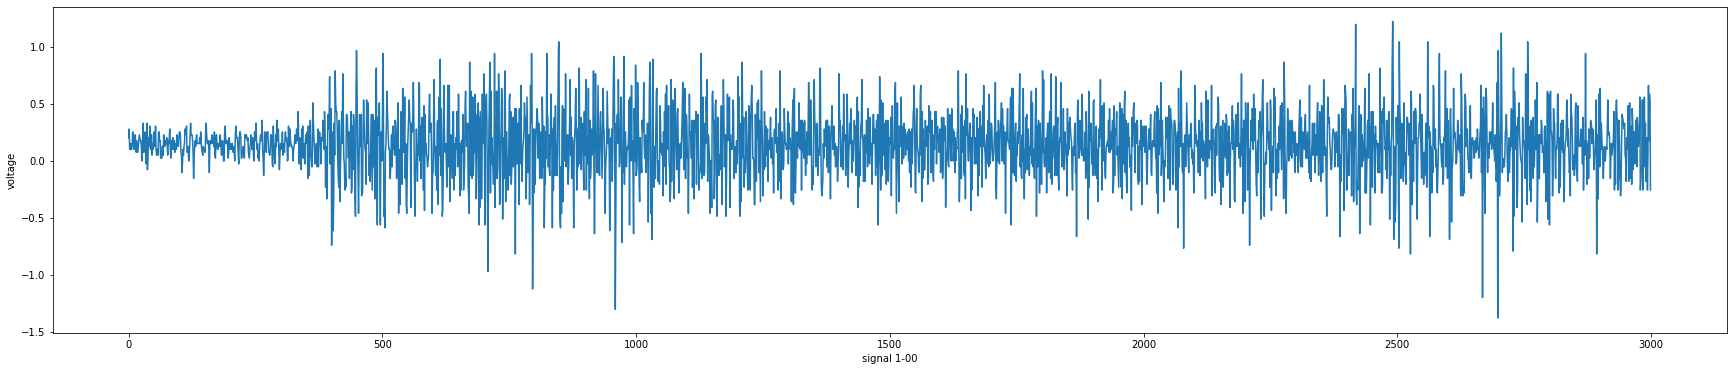

In [39]:

plt.figure(figsize=(30,6))
plt.plot(np.arange(0,3000, 1),cyl_ch1[0])
plt.ylabel('voltage')
plt.xlabel('signal 1-00')
plt.grid()
plt.show()

plt.figure(figsize=(30,6))
plt.plot(np.arange(0,3000, 1),momentum(cyl_ch1[0]))
plt.ylabel('voltage')
plt.xlabel('signal 1-00')
plt.grid()
plt.show()

plt.figure(figsize=(30,6))
plt.plot(np.arange(0,3000, 1),cyl_ch2[0])
plt.ylabel('voltage')
plt.xlabel('signal 1-00')
plt.show()

In [10]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at :{}'.format(device_name))

Found GPU at :/device:GPU:0


# preprocessing- smoothing the data 

In [33]:
def momentum(z):
    n_iter = len(z)
    beta = 0.9
    temp = np.zeros(len(z))
    
    for k in range(0,n_iter-1):
        temp[k+1] = beta*temp[k] +(1-beta) *z[k]
        
    return temp

# preparaing database

In [101]:
y_label=np.repeat([1,2,3,4,5],60)

In [103]:
len(y_label)

300

In [114]:
lol = pd.DataFrame(data_x,y_label)
lol.to_csv('D:/Mtech-SemII/Major Project/EMG_dataset.csv')

In [115]:
emg_data= pd.read_csv('D:/Mtech-SemII/Major Project/EMG_dataset.csv')

In [108]:
emg_data.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
295,5,0.227693,0.304216,0.304216,0.278708,0.100154,-0.001877,0.049139,0.125662,0.176677,...,0.176677,0.227693,0.125662,0.049139,0.431755,0.176677,0.151170,-0.716094,0.074646,0.406247
296,5,0.584801,-0.205939,-0.256954,0.202185,0.559294,-0.307970,0.737848,0.763355,-0.486524,...,0.686832,0.380739,0.355232,-0.027385,-0.231447,-0.052892,0.100154,-0.078400,0.125662,0.023631
297,5,0.610309,0.686832,0.202185,0.253201,0.176677,-0.231447,-0.052892,0.253201,0.253201,...,-0.384493,0.100154,0.202185,0.100154,1.094956,0.686832,0.176677,-0.639571,0.202185,-0.486524
298,5,0.253201,0.278708,0.176677,0.176677,0.049139,0.074646,0.100154,0.049139,0.176677,...,0.100154,0.508278,0.253201,0.355232,0.253201,0.253201,0.049139,0.227693,0.253201,0.023631
299,5,0.253201,0.151170,0.125662,0.380739,0.227693,0.125662,0.355232,0.278708,-0.435509,...,0.049139,-0.001877,0.176677,0.176677,0.457263,0.533786,0.406247,-0.052892,0.125662,-0.282462


In [117]:
emg_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,1,0.0,0.007220,0.034119,0.073629,0.098988,0.101409,0.101038,0.098154,0.090458,...,0.171750,0.067439,0.113818,0.130057,0.091119,0.089227,0.268586,0.289750,0.007878,0.016860
1,1,0.0,0.025071,0.052735,0.067432,0.098511,0.090779,0.073620,0.055627,0.052184,...,0.187398,0.201380,-0.025752,-0.153666,-0.059675,0.024917,0.116351,0.231793,0.146979,0.177754
2,1,0.0,0.012320,0.025958,0.038233,0.046730,0.041626,0.021732,0.016578,0.032340,...,0.194873,0.182606,0.151164,0.112665,0.141771,0.132263,0.110956,0.137682,0.087781,0.129575
3,1,0.0,0.053123,0.037179,0.004979,-0.029102,-0.044473,-0.027706,0.005236,0.039984,...,0.018163,0.046518,0.125591,0.184006,0.193226,0.165822,0.161560,0.218928,0.324113,0.214766
4,1,0.0,-0.031033,-0.046211,-0.013969,0.035450,0.067177,0.072779,0.077822,0.079809,...,0.170244,0.081385,-0.006240,-0.026448,0.019119,0.055029,0.112850,0.182739,0.204837,0.166072


In [ ]:
def maxSum(arr, n,k):
    if not n>k:
        print("invalid")
        return -1
    
    max_sum = 0
    window_sum = sum(arr[:k])
    
    for i range(n-k):
        window_sum= 

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [121]:
Y=emg_data.iloc[:,0].values

In [123]:
X = emg_data.iloc[:,1:3001].values

In [133]:
#Splitting into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size =0.2,random_state=42)

In [134]:
Y_test

array([4, 5, 3, 1, 4, 4, 4, 2, 1, 3, 4, 1, 4, 1, 4, 4, 5, 4, 3, 3, 2, 2,
       5, 5, 2, 1, 5, 5, 3, 4, 1, 3, 1, 1, 4, 2, 1, 2, 1, 2, 2, 2, 5, 2,
       2, 2, 4, 4, 2, 4, 4, 3, 4, 2, 5, 5, 2, 2, 4, 1], dtype=int64)

# using Neural Network model for classification

In [139]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout, BatchNormalization

Using TensorFlow backend.


In [138]:
!pip install keras

In [141]:
model =Sequential()
#relu - non=linear activation function 
#initial layer
model.add(Dense(100,input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# middle layer
model.add(Dense(700))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

#end layer
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [142]:
help(keras.optimizers.Adam)

Help on class Adam in module keras.optimizers:

class Adam(Optimizer)
 |  Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False, **kwargs)
 |  
 |  Adam optimizer.
 |  
 |  Default parameters follow those provided in the original paper.
 |  
 |  # Arguments
 |      learning_rate: float >= 0. Learning rate.
 |      beta_1: float, 0 < beta < 1. Generally close to 1.
 |      beta_2: float, 0 < beta < 1. Generally close to 1.
 |      amsgrad: boolean. Whether to apply the AMSGrad variant of this
 |          algorithm from the paper "On the Convergence of Adam and
 |          Beyond".
 |  
 |  # References
 |      - [Adam - A Method for Stochastic Optimization](
 |         https://arxiv.org/abs/1412.6980v8)
 |      - [On the Convergence of Adam and Beyond](
 |         https://openreview.net/forum?id=ryQu7f-RZ)
 |  
 |  Method resolution order:
 |      Adam
 |      Optimizer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, learning_rate=0.001, beta_1

In [144]:
adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [145]:
model.fit(X_train,Y_train,epochs=100,batch_size=1024)

Epoch 1/100
240/240 [==============================] - 19s 78ms/step - loss: 1.3868 - accuracy: 0.0708
Epoch 2/100
240/240 [==============================] - 0s 299us/step - loss: -0.6480 - accuracy: 0.0833
Epoch 3/100
240/240 [==============================] - 0s 291us/step - loss: -2.1244 - accuracy: 0.1000
Epoch 4/100
240/240 [==============================] - 0s 191us/step - loss: -3.5006 - accuracy: 0.0958
Epoch 5/100
240/240 [==============================] - 0s 561us/step - loss: -4.7988 - accuracy: 0.1000
Epoch 6/100
240/240 [==============================] - 0s 428us/step - loss: -5.8324 - accuracy: 0.0875
Epoch 7/100
240/240 [==============================] - 0s 200us/step - loss: -7.2369 - accuracy: 0.0875
Epoch 8/100
240/240 [==============================] - 0s 196us/step - loss: -8.6197 - accuracy: 0.0917
Epoch 9/100
240/240 [==============================] - 0s 345us/step - loss: -9.9096 - accuracy: 0.0750
Epoch 10/100
240/240 [==============================] - 0s 189us/

Epoch 78/100
240/240 [==============================] - 0s 170us/step - loss: -106.4121 - accuracy: 0.1875
Epoch 79/100
240/240 [==============================] - 0s 158us/step - loss: -107.4881 - accuracy: 0.2000
Epoch 80/100
240/240 [==============================] - 0s 170us/step - loss: -109.6373 - accuracy: 0.2000
Epoch 81/100
240/240 [==============================] - 0s 166us/step - loss: -110.7632 - accuracy: 0.2042
Epoch 82/100
240/240 [==============================] - 0s 161us/step - loss: -112.1042 - accuracy: 0.2042
Epoch 83/100
240/240 [==============================] - 0s 162us/step - loss: -113.4597 - accuracy: 0.2042
Epoch 84/100
240/240 [==============================] - 0s 154us/step - loss: -114.7611 - accuracy: 0.2042
Epoch 85/100
240/240 [==============================] - 0s 150us/step - loss: -116.5552 - accuracy: 0.2042
Epoch 86/100
240/240 [==============================] - 0s 150us/step - loss: -117.8941 - accuracy: 0.2042
Epoch 87/100
240/240 [===============

In [150]:
ytest= model.predict_classes(X_test)

In [151]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(Y_test,ytest))
print(roc_auc_score(ytest,Y_test))

              precision    recall  f1-score   support

           1       0.18      1.00      0.31        11
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00         9

    accuracy                           0.18        60
   macro avg       0.04      0.20      0.06        60
weighted avg       0.03      0.18      0.06        60



C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [155]:
def models(X_train, Y_train):
    
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log  = LogisticRegression(random_state= 0) 
    log.fit(X_train, Y_train)
    
    print('[0]logistic Regression training Accuarcy:',log.score(X_train, Y_train))
    return log

In [156]:
model = models(X_train, Y_train)

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[0]logistic Regression training Accuarcy: 0.9875


In [ ]:
def models(X_train, Y_train):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p =2)
    knn.fit(X_train, Y_train)
    
    print('[1]k neigbours training Accuarcy:',knn.score(X_train, Y_train))
    
    return knn

In [157]:
def models(X_train, Y_train):
    
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log  = LogisticRegression(random_state= 0) 
    log.fit(X_train, Y_train)
    
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p =2)
    knn.fit(X_train, Y_train)
    
    #use SVC (linear model)
    from sklearn.svm import SVC
    svc_lin  = SVC(kernel= 'linear', random_state =0)
    svc_lin.fit(X_train, Y_train)
    
    #use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf  = SVC(kernel= 'rbf', random_state =0)
    svc_rbf.fit(X_train, Y_train)
    
    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy' , random_state= 0)
    tree.fit(X_train, Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(criterion = 'entropy' , random_state= 0)
    forest.fit(X_train, Y_train)
    
    print('[0]logistic Regression training Accuarcy:',log.score(X_train, Y_train))
    print('[1]k neigbours training Accuarcy:',knn.score(X_train, Y_train))
    print('[2]SVC linear regression training Accuarcy:',svc_lin.score(X_train, Y_train))
    print('[3]SVC rbf regression Accuarcy:',svc_rbf.score(X_train, Y_train))
    print('[4] gaussian training Accuarcy:',gauss.score(X_train, Y_train))
    print('[5] Decision tree Accuarcy:',tree.score(X_train, Y_train))
    print('[6]  random forest Accuarcy:',forest.score(X_train, Y_train))
    
    
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [158]:
model =models(X_train, Y_train)

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0]logistic Regression training Accuarcy: 0.9875
[1]k neigbours training Accuarcy: 0.2916666666666667
[2]SVC linear regression training Accuarcy: 0.9958333333333333
[3]SVC rbf regression Accuarcy: 0.22083333333333333
[4] gaussian training Accuarcy: 0.6708333333333333
[5] Decision tree Accuarcy: 1.0
[6]  random forest Accuarcy: 0.9958333333333333
